# **Historical automobile sales (XYZ Automotive - Imaginary company)**
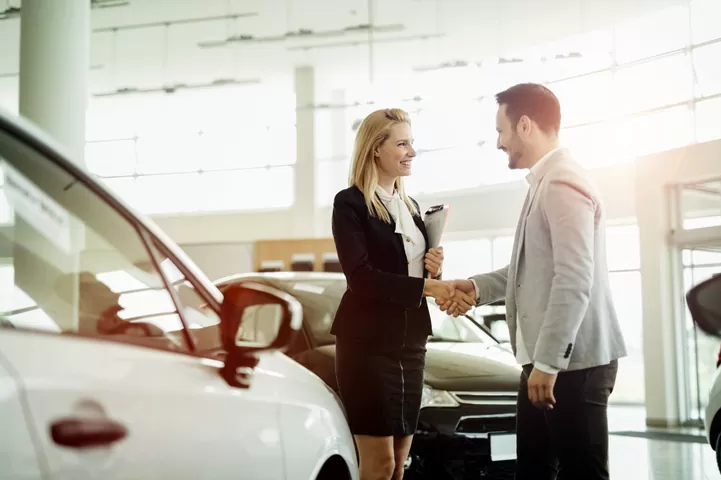

# 1. Objective

Perform analysis of "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods:

- recession period 1 - year 1980 <br>
- recession period 2 - year 1981 to 1982<br>
- recession period 3 - year 1991<br>
- recession period 4 - year 2000 to 2001<br>
- recession period 5 - year end 2007 to mid 2009<br>
- recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

## 2. Dataset Description

The dataset used for this visualization assignment contains `historical_automobile_sales` data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables (columns):

1. `Date`: The date of the observation.
2. `Recession`: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
3. `Automobile_Sales`: The number of vehicles sold during the period.
4. `GDP`: The per capita GDP value in USD.
5. `Unemployment_Rate`: The monthly unemployment rate.
6. `Consumer_Confidence`: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
7. `Seasonality_Weight`: The weight representing the seasonality effect on automobile sales during the period.
8. `Price`: The average vehicle price during the period.
9. `Advertising_Expenditure`: The advertising expenditure of the company.
10. `Vehicle_Type`: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
11. `Competition`: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.

By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

## 3. Visual Analysis

It is not necessarry to perform data cleaning for this dataset.
This dataset is prepared for data visualizations.

### 3.1 Importing Required Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

import warnings
warnings.filterwarnings("ignore")

In [2]:
# URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"


# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the response to a file
    with open('historical_automobile_sales.csv', 'wb') as f:
        f.write(response.content)
    
    # Read the downloaded CSV file into a pandas DataFrame
    df = pd.read_csv('historical_automobile_sales.csv')
    
    print("CSV file downloaded and read successfully.")
else:
    print("Failed to download CSV file.")
df.head(10)

CSV file downloaded and read successfully.


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
5,6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610947,2.9,754.5,Mediumfamilycar,Illinois
6,7/31/1980,1980,Jul,1,82.45,0.50,32896.064,2828,3,34.585,0.413098,2.9,729.6,Supperminicar,Illinois
7,8/31/1980,1980,Aug,1,98.76,0.25,28837.174,2917,3,55.650,0.378527,3.0,734.9,Supperminicar,New York
8,9/30/1980,1980,Sep,1,87.68,0.07,22652.628,1138,3,33.308,-0.670770,5.2,705.6,Smallfamiliycar,California
9,10/31/1980,1980,Oct,1,101.45,0.00,27712.800,4582,5,42.522,0.216688,4.4,609.7,Smallfamiliycar,New York


In [3]:
# Descriptive statistics about numeric data

df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [4]:
# Basic info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

## 3.1 Line chart (shows how automobile sales fluctuate from year to year)

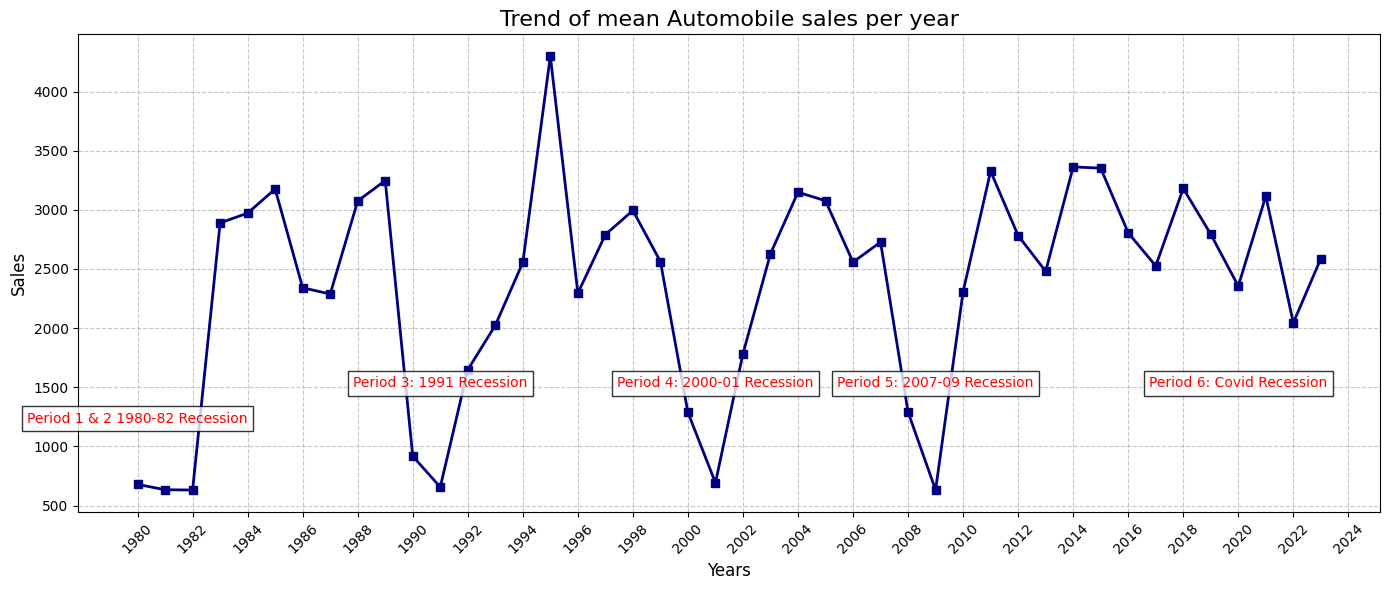

In [5]:
df_line = df.groupby("Year")[["Automobile_Sales"]].mean().round(2)

# Plot line chart
df_line.plot(kind="line", figsize=(14, 6), marker='s',legend=False, color='navy', linestyle='-', linewidth=2, markersize=6)

# Title and labels of plot
plt.title("Trend of mean Automobile sales per year", fontsize=16)
plt.ylabel("Sales", fontsize=12)
plt.xlabel("Years", fontsize=12)
plt.xticks(list(range(1980,2025,2)),rotation = 45, fontsize=10)
plt.text(1980, 1200, 'Period 1 & 2 1980-82 Recession', color = "red", bbox=dict(facecolor='white', alpha=0.8),ha='center')
plt.text(1991, 1500, 'Period 3: 1991 Recession', color = "red", bbox=dict(facecolor='white', alpha=0.8), ha='center')
plt.text(2001, 1500, 'Period 4: 2000-01 Recession', color = "red", bbox=dict(facecolor='white', alpha=0.8), ha='center')
plt.text(2009, 1500, 'Period 5: 2007-09 Recession', color = "red", bbox=dict(facecolor='white', alpha=0.8), ha='center')
plt.text(2020, 1500, 'Period 6: Covid Recession', color = "red", bbox=dict(facecolor='white', alpha=0.8), ha='center')
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

- recession period 1 - year 1980
- recession period 2 - year 1981 to 1982
- recession period 3 - year 1991
- recession period 4 - year 2000 to 2001
- recession period 5 - year end 2007 to mid 2009
- recession period 6 - year 2020 -Feb to April (Covid-19 Impact)

## 3.2 Plot different lines for categories of vehicle type and analyze the trend

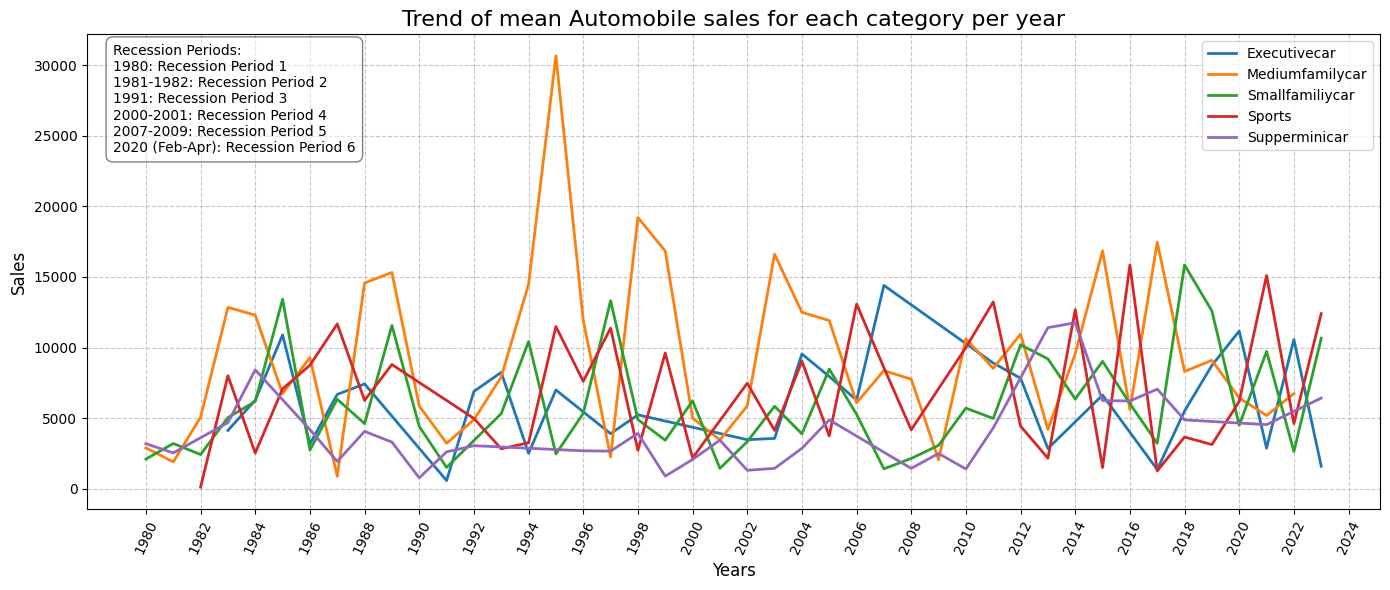

In [6]:
df_category = df.groupby(["Year", "Vehicle_Type"], as_index = False)["Automobile_Sales"].sum().round(2).set_index("Year")

df_category = df_category.groupby(['Vehicle_Type'])['Automobile_Sales']

# Plot line chart
df_category.plot(kind="line", figsize=(14, 6), linestyle='-', linewidth=2)

# Title and labels of plot
plt.title("Trend of mean Automobile sales for each category per year", fontsize=16)
plt.legend(df_category.groups.keys())
plt.ylabel("Sales", fontsize=12)
plt.xlabel("Years", fontsize=12)
plt.xticks(list(range(1980,2025,2)),rotation = 65)
plt.grid(True, linestyle='--', alpha=0.7)

# Add recession box to the top-left corner
recession_text = """Recession Periods:
1980: Recession Period 1
1981-1982: Recession Period 2
1991: Recession Period 3
2000-2001: Recession Period 4
2007-2009: Recession Period 5
2020 (Feb-Apr): Recession Period 6"""
plt.text(0.02, 0.98, recession_text, color="black", fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5',alpha=0.5),
         transform=plt.gca().transAxes, ha='left', va='top')

# Show plot
plt.tight_layout()
plt.show()

## 3.3 Compare the sales trend per vehicle type for a recession period with a non-recession period

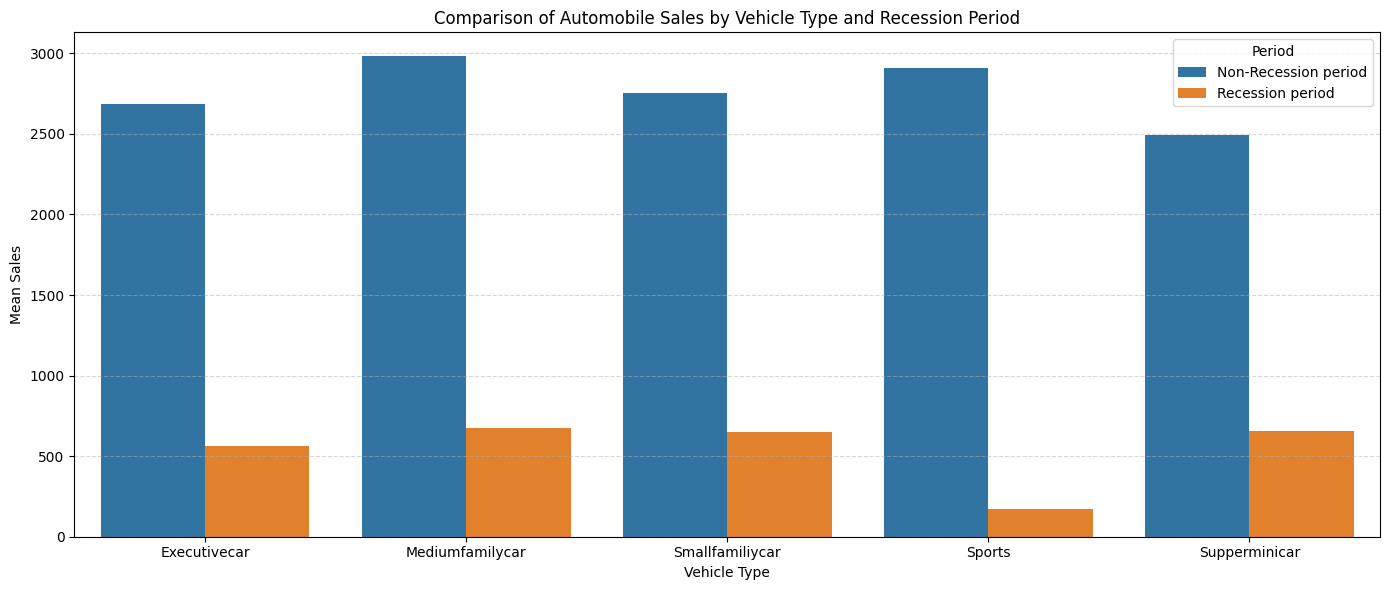

In [7]:
df_barchart = df.groupby(["Recession", "Vehicle_Type"])["Automobile_Sales"].mean().reset_index()
df_barchart["Recession"] = df_barchart["Recession"].replace({0: "Non-Recession period", 1: "Recession period"})

plt.figure(figsize=(14, 6))
sns.barplot(data=df_barchart, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.title("Comparison of Automobile Sales by Vehicle Type and Recession Period")
plt.xlabel("Vehicle Type")
plt.ylabel("Mean Sales")
plt.legend(title="Period", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 3.4 Compare the variations in GDP during recession and non-recession period by developing line plots for each period

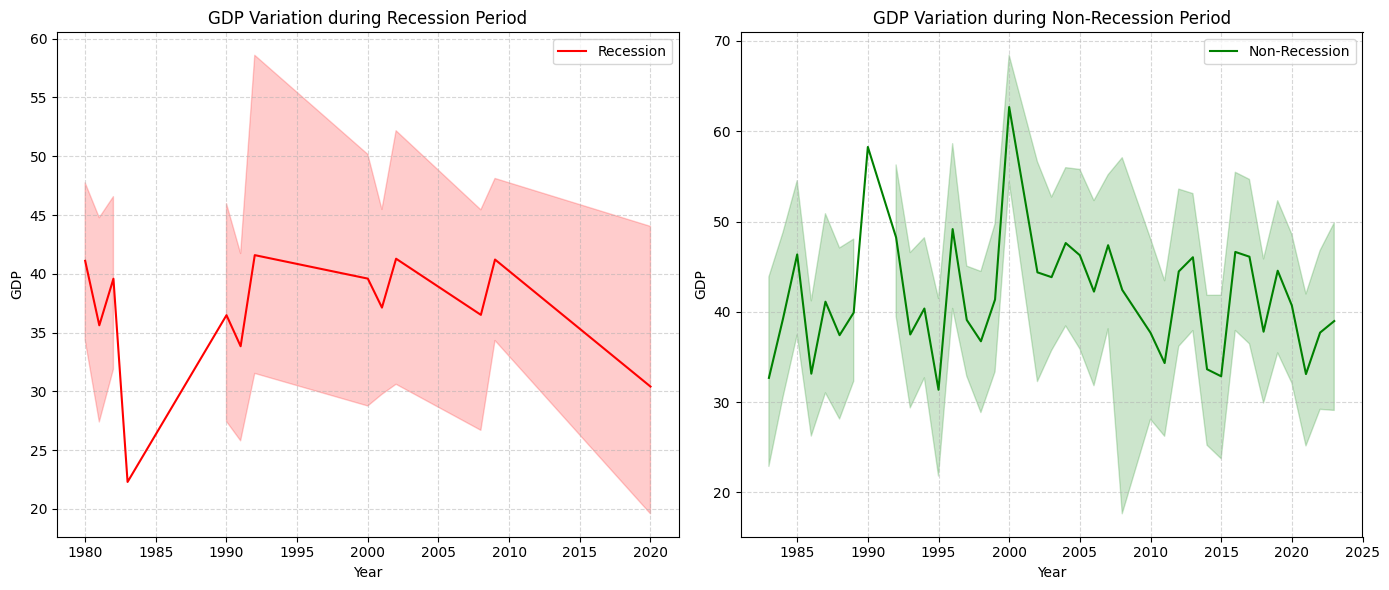

In [8]:
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

# Create figure and subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for recession period
sns.lineplot(x='Year', y='GDP', data=recession_data, label='Recession', color='red', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
ax0.grid(True, linestyle='--', alpha=0.5)

# Plot for non-recession period
sns.lineplot(x='Year', y='GDP', data=non_recession_data, label='Non-Recession', color='green', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
ax1.grid(True, linestyle='--', alpha=0.5)

# Customizing legend
ax0.legend(loc='upper right')
ax1.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## 3.5 Correlation between average vehicle price relate to the sales volume during recessions

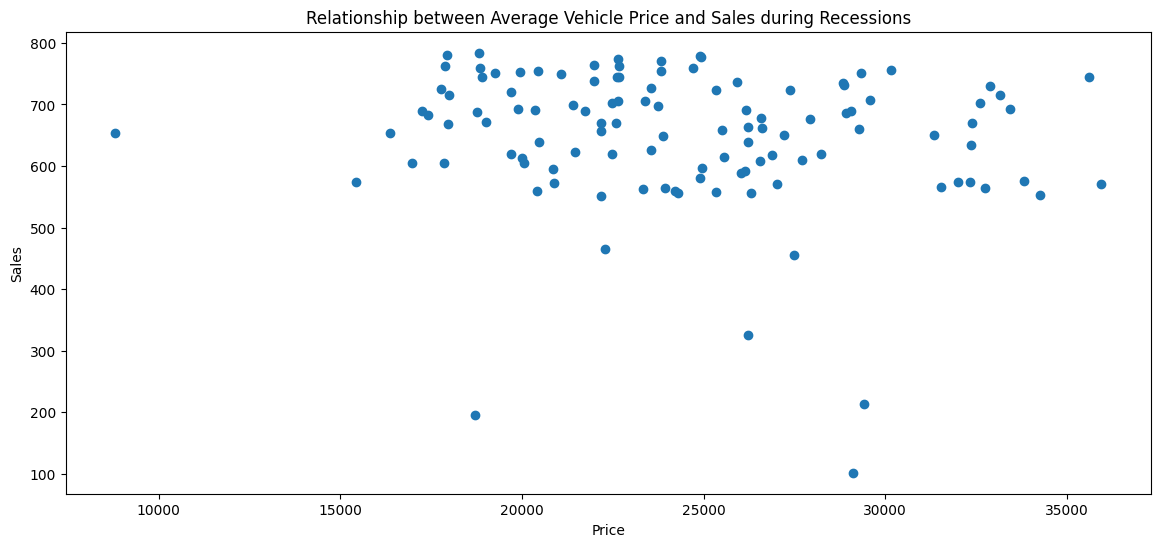

In [9]:
recession_data = df[df['Recession'] == 1]
plt.figure(figsize=(14, 6))
plt.scatter(data=recession_data, x="Price", y="Automobile_Sales")
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

There is no correlation between sales and price during recession.

## 3.6 Proportion of advertising expenditure of XYZAutomotives during recession and non-recession periods

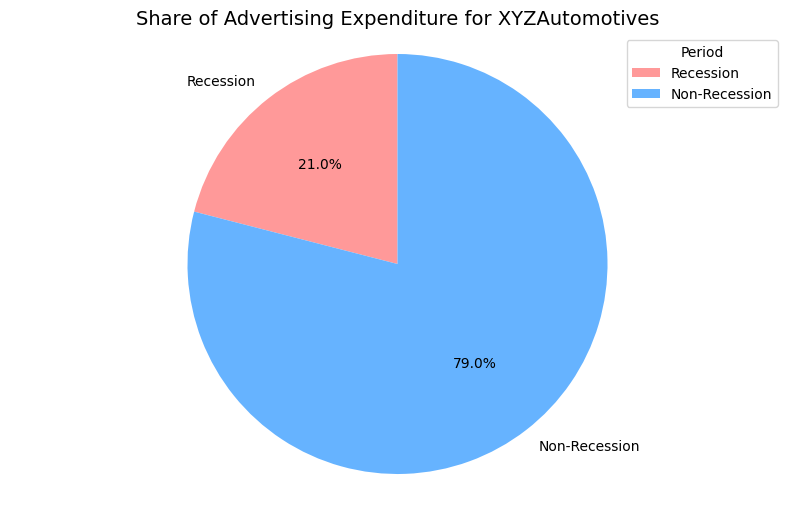

In [10]:
# Data preparation
recession_data = df[df['Recession'] == 1]
RAtotal = recession_data["Advertising_Expenditure"].sum()
non_recession_data = df[df['Recession'] == 0]
NRtotal = non_recession_data["Advertising_Expenditure"].sum()

# Define colors
colors = ['#ff9999','#66b3ff']

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie([RAtotal, NRtotal], labels=['Recession', 'Non-Recession'], autopct='%1.1f%%', startangle=90, colors=colors)

# Add title
plt.title("Share of Advertising Expenditure for XYZAutomotives", fontsize=14)

# Add legend
plt.legend(title="Period", loc="upper right")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show plot
plt.show()

## 3.7 Proportion of Advertisement expenditure for each vehicle type during recession period

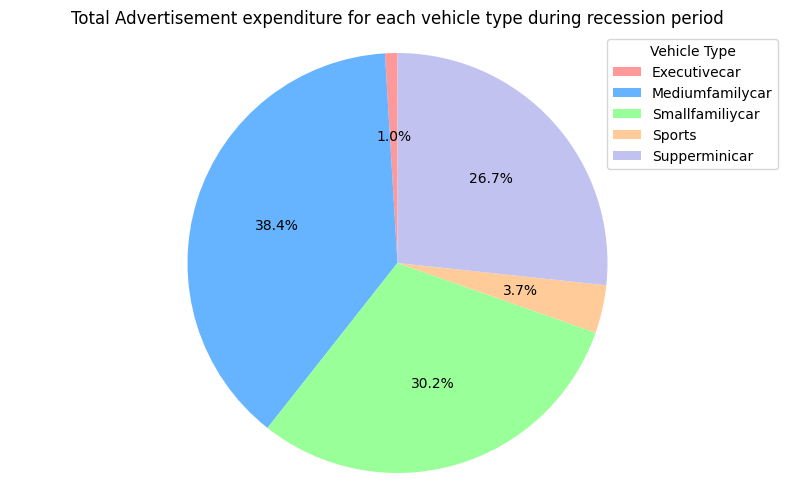

In [11]:
# Filter the data for recessions
Rdata = df[df['Recession'] == 1]

# Calculate the advertising expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10, 6))

# Define custom colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Plot pie chart
wedges, texts, autotexts = plt.pie(VTexpenditure, labels=None, colors = colors ,autopct='%1.1f%%', startangle=90)

# Add legend for labels and percentages
plt.legend(wedges, VTexpenditure.index, title="Vehicle Type", loc="upper right")

# Add title
plt.title('Total Advertisement expenditure for each vehicle type during recession period')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show plot
plt.show()

## 3.8 Effect of the unemployment rate on sales during the Recession Period per each vehicle type

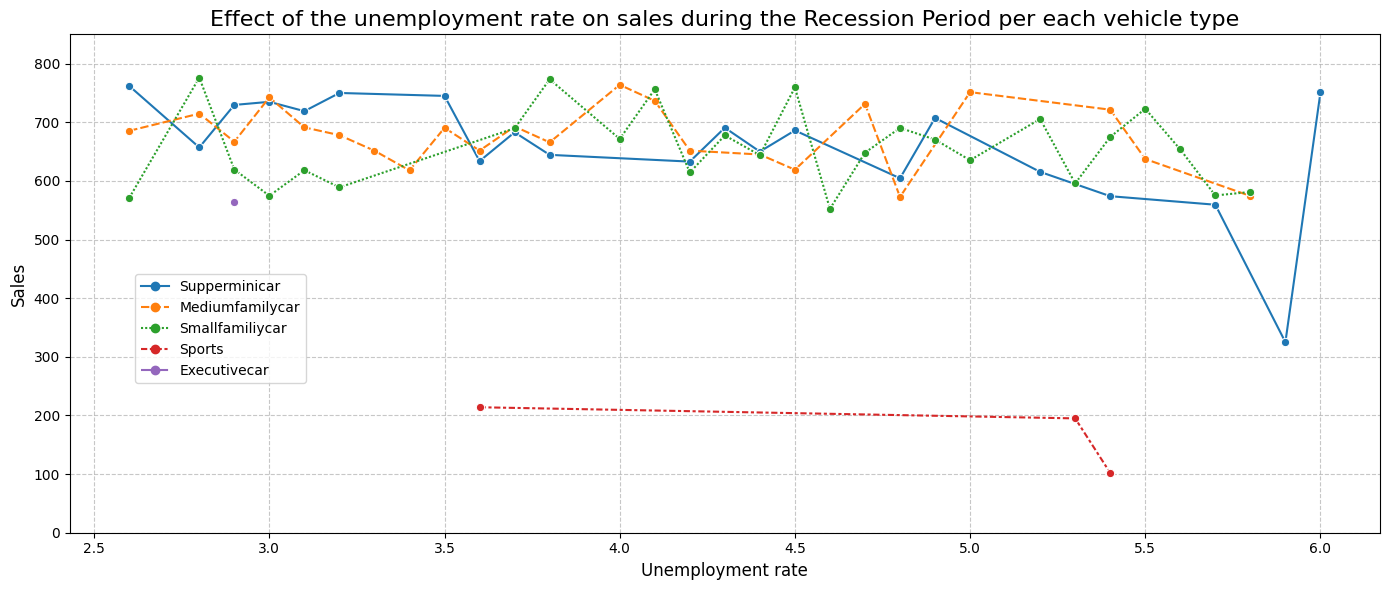

In [12]:
df_rec = df[df['Recession']==1]
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.title('Effect of the unemployment rate on sales during the Recession Period per each vehicle type', fontsize=16)
plt.ylabel("Sales", fontsize=12)
plt.xlabel("Unemployment rate", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## 3.9 Map on the hightest sales region/offices of the company during recession period

We obtained data only for four cities:

In [13]:
df["City"].value_counts()

City
New York      144
Illinois      134
California    129
Georgia       121
Name: count, dtype: int64

In [14]:
# URL of the CSV file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'


# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the response to a file
    with open('us-states.json', 'wb') as f:
        f.write(response.content)
    
    # Read the downloaded CSV file into a pandas DataFrame
    filename = "us-states.json"
    
    print("JSON file downloaded and read successfully.")
else:
    print("Failed to download Json file.")

JSON file downloaded and read successfully.


In [15]:
# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

    # Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


    # Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

    # Display the map
map1